# Librerie

In [ ]:
# installo le librerie
!pip install StandardScaler
!pip install shap
!pip install pandas>=1.2.0
!pip install xlrd
!pip install xlrd>=1.2.0
!pip install --upgrade xlrd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for StandardScaler: filename=StandardScaler-0.5-py3-none-any.whl size=2614 sha256=4abb101bb67871da3bc9a445fae68777df1c73860ca45066a8717a7fdcc05a54
  Stored in directory: /root/.cache/pip/wheels/96/4c/35/4b72d578909a5b4812388c124c58f04651bf2423981ab749b3
Successfully built StandardScaler
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 4.5 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 96 kB 2.6 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0


In [ ]:
# importo le librerie
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
import StandardScaler
import shap
# inizializzo il seme random per la generazione di numeri pseudocasuali
np.random.seed(0)

In [ ]:
# mount drive per il caricamento dei dati clinici
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# DATA PREPARATION

In [ ]:
# leggo l'excel dei dati clinici
databasePath = 'drive/MyDrive/Dataset/TrainSet (1)/'
COVID19_clinical_data = pd.read_excel(databasePath + 'trainClinData.xls') 

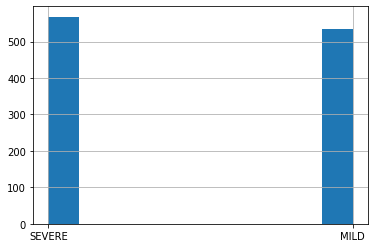

In [ ]:
# mostra che le due classi sono bilanciate
COVID19_clinical_data['Prognosis'].hist()

In [ ]:
# Transcodifica di lable di output "prognosis"
Y = COVID19_clinical_data['Prognosis']
Y = Y.replace('MILD', 0)
Y = Y.replace('SEVERE', 1)
Y.shape

(1103,)

In [ ]:
# prendo solo le caratteristiche necessarie 
X =  COVID19_clinical_data[['Age', 'Sex', 'Temp_C', 'DaysFever','Cough', 'DifficultyInBreathing', 'WBC', 'RBC','CRP', 'Glucose', 'LDH', 'INR', 'Ox_percentage',
         'PaO2', 'SaO2', 'PaCO2', 'pH', 'HighBloodPressure', 'Diabetes', 'Dementia', 'BPCO', 'Cancer', 'ChronicKidneyDisease', 'RespiratoryFailure']]

X

,Age,Sex,Temp_C,DaysFever,Cough,DifficultyInBreathing,WBC,RBC,CRP,Glucose,...,SaO2,PaCO2,pH,HighBloodPressure,Diabetes,Dementia,BPCO,Cancer,ChronicKidneyDisease,RespiratoryFailure
0,72.000000,1,37.3,3,1,0,5.37,4.58,3.96,98,...,93.0,34.0,7.46,0,0,0,0,1,0,0
1,35.913889,0,39.3,3,1,0,5.76,5.24,43.40,124,...,92.4,33.0,7.46,1,0,0,0,0,0,0
2,57.266667,0,37.0,3,0,0,11.48,5.71,64.00,124,...,96.9,37.0,7.42,0,0,0,0,0,0,0
3,39.000000,1,37.2,2,1,0,10.17,3.45,0.75,80,...,97.0,41.0,7.38,0,0,0,0,0,0,0
4,44.000000,0,38.0,3,1,0,6.64,5.55,5.20,126,...,94.0,37.0,7.47,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1098,71.731691,0,38.0,0,1,1,0.47,3.43,26.50,111,...,96.0,33.0,7.46,0,0,0,0,0,0,0
1099,89.106092,0,36.0,0,1,1,8.10,4.00,7.96,77,...,92.0,33.0,7.46,0,0,0,0,0,0,0
1100,70.042437,1,37.2,0,1,1,5.13,4.90,10.10,81,...,92.0,33.0,7.46,0,0,0,0,0,0,0
1101,78.253251,1,37.0,0,1,0,7.14,5.14,33.48,188,...,85.0,33.0,7.46,0,0,0,0,0,0,0


In [ ]:
# Divde i dati fra train e test set:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)


In [ ]:
# Crea il modello tramite regressore random forest: 
model = RandomForestClassifier(max_depth=6, random_state=0, n_estimators=10) 
model.fit(X_train, Y_train)

RandomForestClassifier(max_depth=6, n_estimators=10, random_state=0)

# SHAP Graph

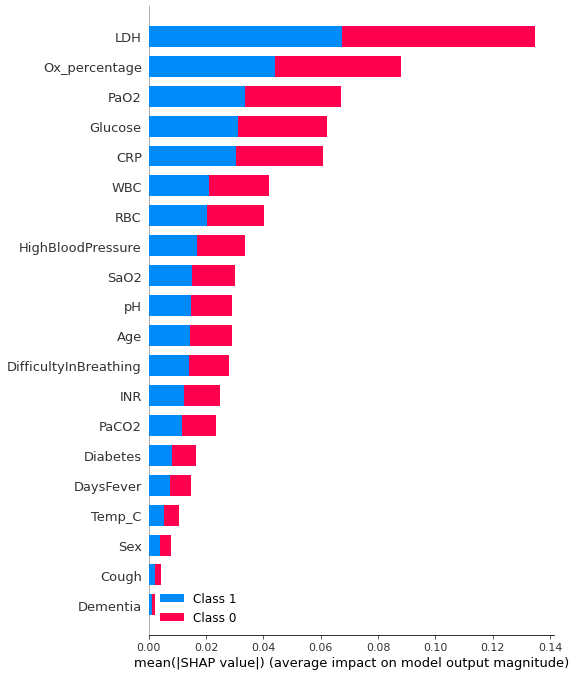

In [ ]:
# Grafico riassuntivo sull'importanza di una variabile (in ordine di importanza decrescente a partire dall'alto)
shap_values = shap.TreeExplainer(model).shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type="bar")

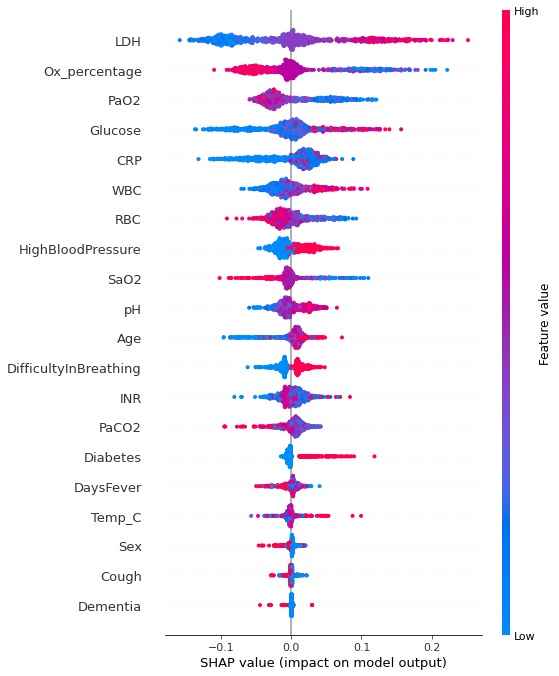

In [ ]:
# Summary plot
shap.summary_plot(shap_values[1], X_train)